# 데이터 수집
1. 목표 수립
2. 금융투자 분야 확인 
    - 전통투자(stock / bonds): 공모(IPO) 투자 방식 
    - 대체투자(전통대체투자(부동산,실물투자) / 현대대체투자(Alternative investment, funds, 가상자산(비트코인, NFT)): 사모 투자 방식
3. 데이터 위치 확인 (엑셀에 리스트업하기)
4. 수집

In [59]:
from bs4 import BeautifulSoup #파싱, select 하는 애
from urllib.request import urlopen #웹 데이터 접근
import numpy as np
import pandas as pd
import urllib
from tqdm import tqdm
import matplotlib.pyplot as plt

1. https://movie.naver.com/ : 서버 호출
2. movie/sdb/rank/rmovie.naver : 요청 URL
3. ?sel=cur&date=20220313 : 퀴리스트링(세부요청)
    - select from where sel=cur and date=20220313 가 됨
    - 쿼리 스트링은 where절의 조건이 됨

In [3]:
# 목표: 네이버 영화 평점 수집
# Base_url=https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220313
url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.naver?sel=cur&date=20220313'

In [4]:
# 1. contents loading
page = urlopen(url_base + url_sub) #url 합치기
soup = BeautifulSoup(page, 'html.parser') #파싱

In [5]:
# soup.find() : 첫번째꺼 추출
# soup.find_all() : 다 추출
tmp = soup.find_all('div', class_='tit5') # 추출할 위치 select

In [6]:
len(tmp)

23

In [7]:
tmp[0].a.string # a 태그를 값만 뽑아서 string으로 변환해서 가져오기

'씽2게더'

In [8]:
for obj in tmp: # 한 페이지의 모든 a태그에 있는 값만 string으로 가져오기
    print(obj.a.string)

씽2게더
극장판 주술회전 0
전투왕
코다
스파이더맨: 노 웨이 홈
화양연화
드라이브 마이 카
이상한 나라의 수학자
광대: 소리꾼
어나더 라운드
나이트메어 앨리
듄
하우스 오브 구찌
파워 오브 도그
나일 강의 죽음
언차티드
킹메이커
더 배트맨
안테벨룸
만년이 지나도 변하지 않는 게 있어
나의 촛불
해적: 도깨비 깃발
인민을 위해 복무하라


In [9]:
# point 추출
tmp_pont = soup.find_all('td', class_='point')

In [10]:
len(tmp_pont)

23

In [11]:
for point in tmp_pont:
    print(point.string)

9.42
9.32
9.23
9.19
8.86
8.80
8.54
8.52
8.42
8.28
8.24
7.96
7.91
7.73
7.69
7.65
7.30
7.14
7.11
6.74
6.17
5.67
5.22


# 주식 수집 페이지 (알아두기)
https://finance.naver.com/item/sise_time.naver?code=005930&thistime=20220314113851

In [21]:
date = pd.date_range(
     '2022-01-01'
    ,periods=60 #60일치 가져오기
    ,freq='D' #날짜로 가져오기
)
date

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [22]:
date[0]

Timestamp('2022-01-01 00:00:00', freq='D')

In [25]:
#Timestamp를 포맷 지정해서 문자열로 바꾸기
date[0].strftime('%Y%m%d')

'20220101'

In [32]:
url = 'https://movie.naver.com/' + \
'movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
res = urlopen(
    url.format(date=date[0].strftime('%Y%m%d'))
)
# res.status

soup = BeautifulSoup(res, 'html.parser')
# soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220101" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [83]:
# 날짜, 영화명, 평점 저장하기
# url_base = 'https://movie.naver.com/'
# url_sub = 'movie/sdb/rank/rmovie.naver?sel=cur&date=20220313'
# 1. 빈 리스트 생성
movie_date  = []
movie_name  = []
movie_point = []



# 2. 담기
for today in tqdm(date): #today는 Timestamp 임
    url = 'https://movie.naver.com/' + \
        'movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
    response = urlopen(
        url.format(date=today.strftime('%Y%m%d')) #주소에 {date} 포맷에 값 넣기
    )
    soup = BeautifulSoup(response, 'html.parser') #파싱해서 돔트리 생성하기
    cnt = len(soup.find_all('td', class_='point')) # 날짜별 개수
    #날짜 가져오는 for (for 돌려서 찾은 n 갑 중에서 today만 가져오기)
    movie_date.extend([today for n in range(0, cnt)]) #append를 하면 리스트 안에 리스트로 들어가니까 extend로 값만 연장되게 넣음
    #영화명 가져오는 for (for n in range(0, cnt) 한거를 soup.find_all('dev', class_='tit5')[n].a.string 해라)
    movie_name.extend([soup.find_all('div', class_='tit5')[n].a.string 
                       for n in range(0, cnt)])
    #평점 가져오는 for
    movie_point.extend([soup.find_all('td', class_='point')[n].string 
                        for n in range(0, cnt)])

100%|██████████████████████████████████████████████████████████████| 60/60 [00:21<00:00,  2.83it/s]


In [80]:
movie_date[:30]

[Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp('2022-01-01 00:00:00', freq='D'),
 Timestamp

In [84]:
len(movie_date), len(movie_name), len(movie_point) # len이 같아야 데이터프레임으로 만들 수 있으니까 결과들 len확인하기

(1374, 1374, 1374)

In [82]:
movie_date[:5], movie_name[:10], movie_point[:5] # 조회가 불편함 > 데이터프레임으로 만들어서 사용하면 편함

([Timestamp('2022-01-01 00:00:00', freq='D'),
  Timestamp('2022-01-01 00:00:00', freq='D'),
  Timestamp('2022-01-01 00:00:00', freq='D'),
  Timestamp('2022-01-01 00:00:00', freq='D'),
  Timestamp('2022-01-01 00:00:00', freq='D')],
 ['전투왕',
  '씽2게더',
  '극장판 주술회전 0',
  '코다',
  '스파이더맨: 노 웨이 홈',
  '고양이를 부탁해',
  '화양연화',
  '마미',
  '돈 룩 업',
  '드라이브 마이 카'],
 ['9.53', '9.43', '9.37', '9.21', '8.87'])

In [47]:
# 데이터프레임 생성
movie = pd.DataFrame({ # key(col) : value(values) 형태로 바로 집어넣기
      'date' : movie_date
    , 'name' : movie_name
    , 'point' : movie_point
})
movie.head()

,date,name,point
0,2022-01-01,코다,9.24
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
2,2022-01-01,러브 액츄얼리,8.93
3,2022-01-01,아멜리에,8.81
4,2022-01-01,고양이를 부탁해,8.81


In [48]:
movie.info() #문자는 차트로 계산할 수 없으니까 숫자는 실수형으로 바꾸기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1374 non-null   datetime64[ns]
 1   name    1374 non-null   object        
 2   point   1374 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 32.3+ KB


In [49]:
# 계산 위해서 point > float로 변환
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1374 non-null   datetime64[ns]
 1   name    1374 non-null   object        
 2   point   1374 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.3+ KB


In [50]:
#각 영화별(group by) 평점 합계(sum) 구하기 > 피벗테이블 이용
movie_unique = pd.pivot_table(
     movie
    ,index=movie['name'] #영화명을 인덱스로 보냄
    ,aggfunc=np.sum
)
movie_unique

,point
name,
355,75.75
경관의 피,369.82
고양이를 부탁해,264.30
공각기동대,96.03
광대: 소리꾼,50.47
...,...
하우스 오브 구찌,373.54
해리 포터와 불사조 기사단,140.67
해적: 도깨비 깃발,224.97


In [51]:
# 상위 영화 평점순 정렬
movie_best = movie_unique.sort_values(
     by='point'
    ,ascending=False
)
movie_best.head()

,point
name,
스파이더맨: 노 웨이 홈,533.78
씽2게더,518.42
킹스맨: 퍼스트 에이전트,475.36
드라이브 마이 카,472.81
프렌치 디스패치,423.51


In [52]:
movie.head()

,date,name,point
0,2022-01-01,코다,9.24
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
2,2022-01-01,러브 액츄얼리,8.93
3,2022-01-01,아멜리에,8.81
4,2022-01-01,고양이를 부탁해,8.81


In [57]:
#데이터프레임에서 특정 컬럼의 값으로 조회 (SQL의 where 조건과 유사)
tmp = movie.query('name == ["스파이더맨: 노 웨이 홈"]') #query(''): 조건 주면 search하는 메소드
tmp

,date,name,point
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
20,2022-01-02,스파이더맨: 노 웨이 홈,8.96
38,2022-01-03,스파이더맨: 노 웨이 홈,8.95
57,2022-01-04,스파이더맨: 노 웨이 홈,8.95
76,2022-01-05,스파이더맨: 노 웨이 홈,8.95
94,2022-01-06,스파이더맨: 노 웨이 홈,8.95
113,2022-01-07,스파이더맨: 노 웨이 홈,8.94
133,2022-01-08,스파이더맨: 노 웨이 홈,8.93
153,2022-01-09,스파이더맨: 노 웨이 홈,8.93
171,2022-01-10,스파이더맨: 노 웨이 홈,8.92


In [58]:
tmp = movie.query('name == ["코다"]')
tmp

,date,name,point
0,2022-01-01,코다,9.24
19,2022-01-02,코다,9.24
37,2022-01-03,코다,9.24
56,2022-01-04,코다,9.23
75,2022-01-05,코다,9.23
92,2022-01-06,코다,9.23
111,2022-01-07,코다,9.23
131,2022-01-08,코다,9.23
151,2022-01-09,코다,9.23
169,2022-01-10,코다,9.23


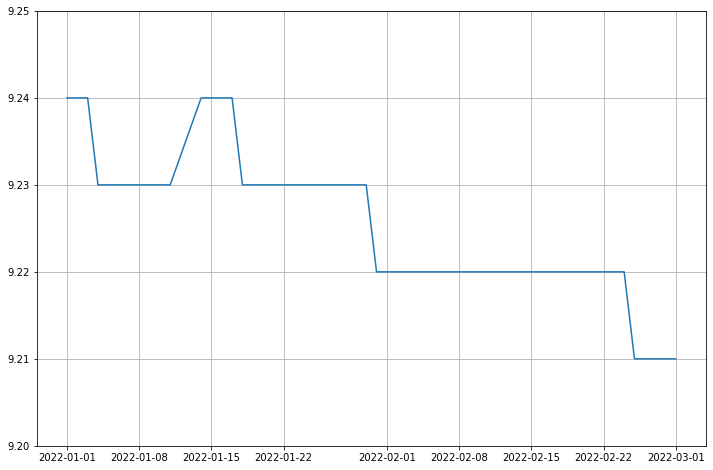

In [61]:
#시각화하기
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point']) #x축: tmp['date'] / y축: tmp['point']
plt.ylim(9.20, 9.25) #y limit 조회할 값 지정
plt.grid()
plt.show()

In [62]:
movie.head()

,date,name,point
0,2022-01-01,코다,9.24
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
2,2022-01-01,러브 액츄얼리,8.93
3,2022-01-01,아멜리에,8.81
4,2022-01-01,고양이를 부탁해,8.81


In [64]:
# 차트 그리기
movie_pivot = pd.pivot_table(
     movie
    ,index=movie['date'] #인덱스를 날짜로 잡기
    ,columns=['name'] #영화이름을 컬럼으로 보내기
    ,values=['point'] #값으로 평점 넣기
)
movie_pivot.head()

point                                                            \
name         355 경관의 피 고양이를 부탁해 공각기동대 광대: 소리꾼  귀향 그녀에게 극장판 주술회전 0 기쿠지로의 여름   
date                                                                         
2022-01-01   NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN      NaN   
2022-01-02   NaN   NaN      NaN  8.73     NaN NaN  NaN        NaN      NaN   
2022-01-03   NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN      NaN   
2022-01-04   NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN      NaN   
2022-01-05   NaN  8.18     8.81  8.73     NaN NaN  NaN        NaN      NaN   

                  ...                                                   \
name       나쁜 교육  ...   태일이  특송 틱, 틱... 붐! 파워 오브 도그 프렌치 디스패치 하우스 오브 구찌   
date              ...                                                    
2022-01-01   NaN  ...  8.49 NaN        NaN      NaN     8.02       NaN   
2022-01-02   NaN  ...  8.50 NaN        NaN      NaN     8.02       NaN   
2022-01-03   NaN  ...  8.48 NaN        NaN      NaN     8.01       NaN   
2022-01-04   NaN  ...  8.49 NaN        NaN      NaN     8.01       NaN   
2022-01-05   NaN  ...   NaN NaN        NaN      NaN     8.01       NaN   

                                                   
name       해리 포터와 불사조 기사단 해적: 도깨비 깃발 해피 뉴 이어 화양연화  
date                                               
2022-01-01            NaN        NaN    7.21  NaN  
2022-01-02            NaN        NaN    7.14  NaN  
2022-01-03            NaN        NaN    7.11  NaN  
2022-01-04            NaN        NaN    7.08  NaN  
2022-01-05            NaN        NaN    7.10  NaN  

[5 rows x 69 columns]

In [72]:
movie_pivot.columns #컬럼이름에 point가 걸려있음

MultiIndex([('point',                   '355'),
            ('point',                 '경관의 피'),
            ('point',              '고양이를 부탁해'),
            ('point',                 '공각기동대'),
            ('point',               '광대: 소리꾼'),
            ('point',                    '귀향'),
            ('point',                  '그녀에게'),
            ('point',            '극장판 주술회전 0'),
            ('point',              '기쿠지로의 여름'),
            ('point',                 '나쁜 교육'),
            ('point',                 '나의 촛불'),
            ('point',              '나이트메어 앨리'),
            ('point',              '나일 강의 죽음'),
            ('point',              '단지 세상의 끝'),
            ('point',                 '더 배트맨'),
            ('point',                  '더 헌트'),
            ('point',                  '덩케르크'),
            ('point',                 '돈 룩 업'),
            ('point',                     '듄'),
            ('point',             '드라이브 마이 카'),
            ('point',              '디어 에

In [74]:
# 인덱스에 들어가 있는 point 지우기
movie_pivot.columns = movie_pivot.columns.droplevel() #맨 위에 있는 인덱스 하나만 지움

In [75]:
movie_pivot.head() #point 삭제된 거 확인 > 영화명이 컬럼명이 되었음

name,355,경관의 피,고양이를 부탁해,공각기동대,광대: 소리꾼,귀향,그녀에게,극장판 주술회전 0,기쿠지로의 여름,나쁜 교육,...,태일이,특송,"틱, 틱... 붐!",파워 오브 도그,프렌치 디스패치,하우스 오브 구찌,해리 포터와 불사조 기사단,해적: 도깨비 깃발,해피 뉴 이어,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,8.49,NaN,NaN,NaN,8.02,NaN,NaN,NaN,7.21,NaN
2022-01-02,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,8.50,NaN,NaN,NaN,8.02,NaN,NaN,NaN,7.14,NaN
2022-01-03,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,8.48,NaN,NaN,NaN,8.01,NaN,NaN,NaN,7.11,NaN
2022-01-04,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,8.49,NaN,NaN,NaN,8.01,NaN,NaN,NaN,7.08,NaN
2022-01-05,NaN,8.18,8.81,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.01,NaN,NaN,NaN,7.10,NaN


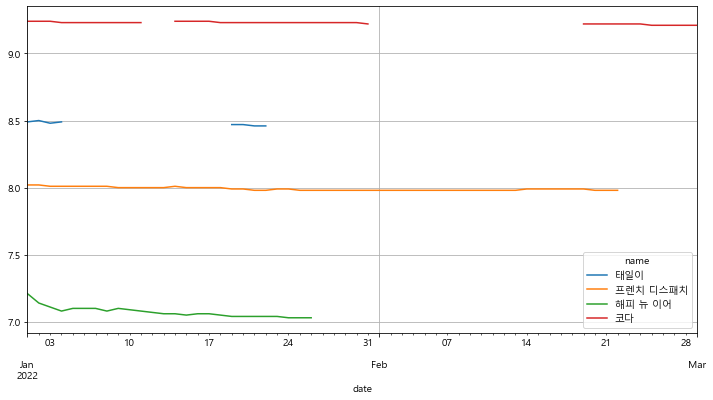

In [77]:
#태일이 프렌치 디스패치 해피 뉴 이어
# 차트 그릴 때 한글처리
from matplotlib import font_manager, rc
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name) # 리소스에 등록하기

movie_pivot.plot( #movie_pivot: 데이터프레임에서 바로 피벗만들기
     y=['태일이', '프렌치 디스패치', '해피 뉴 이어', '코다']
    ,figsize=(12,6)
)
plt.grid()
plt.show() #데이터가 끊긴 애들은 순위 밖으로 나갔던 것임